In [25]:
# LinearRegression is a machine learning library for linear regression
from sklearn.linear_model import LinearRegression 

# pandas and numpy are used for data manipulation 
import pandas as pd 
import numpy as np 

# matplotlib and seaborn are used for plotting graphs 
import matplotlib.pyplot as plt 
import seaborn 

# fix_yahoo_finance is used to fetch data 
#! pip install fix_yahoo_finance
import fix_yahoo_finance as yf

[*********************100%***********************]  1 of 1 downloaded


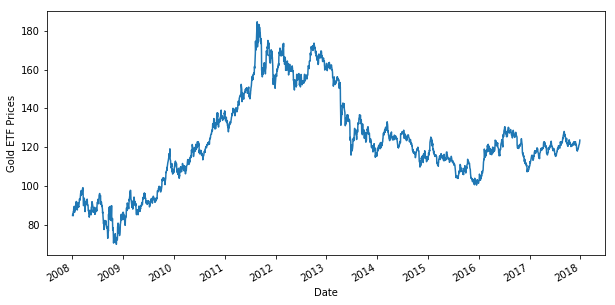

In [26]:
# Read data 
Df = yf.download('GLD', '2008-01-01', '2017-12-31')

# Only keep close columns 
Df = Df[['Close']] 

# Drop rows with missing values 
Df = Df.dropna() 

# Plot the closing price of GLD 
Df.Close.plot(figsize=(10, 5)) 
plt.ylabel("Gold ETF Prices")
plt.show()

In [27]:
Df['S_3'] = Df['Close'].shift(1).rolling(window=3).mean() 
Df['S_9']= Df['Close'].shift(1).rolling(window=9).mean() 
Df= Df.dropna() 

X = Df[['S_3','S_9']] 
X.head()

,S_3,S_9
Date,,
2008-01-15,88.790001,86.670000
2008-01-16,88.703334,87.017777
2008-01-17,88.076665,87.143333
2008-01-18,87.063332,87.295555
2008-01-22,86.873332,87.590000


In [28]:
y = Df['Close']
y.head()

Date
2008-01-15    87.989998
2008-01-16    86.699997
2008-01-17    86.500000
2008-01-18    87.419998
2008-01-22    88.169998
Name: Close, dtype: float64

In [29]:
t = .8 
t = int(t*len(Df)) 

# Train dataset 
X_train = X[:t] 
y_train = y[:t]  

# Test dataset 
X_test = X[t:] 
y_test = y[t:]

In [30]:
#Y = m1 * X1 + m2 * X2 + CGold ETF price = m1 * 3 days moving average + m2 * 15 days moving average + c
linear = LinearRegression().fit(X_train, y_train) 

print("Gold ETF Price =", round(linear.coef_[0], 2))
print("* 3 Days Moving Average", round(linear.coef_[1], 2))
print("* 9 Days Moving Average +", round(linear.intercept_, 2))

Gold ETF Price = 1.19
* 3 Days Moving Average -0.2
* 9 Days Moving Average + 0.37


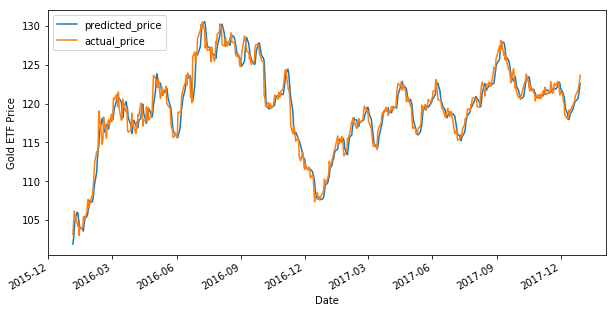

In [31]:
predicted_price = linear.predict(X_test)  
predicted_price = pd.DataFrame(predicted_price, index=y_test.index, columns = ['price'])  
predicted_price.plot(figsize=(10, 5))  

y_test.plot()  
plt.legend(['predicted_price','actual_price'])  
plt.ylabel("Gold ETF Price")  
plt.show()

In [32]:
r2_score = linear.score(X[t:], y[t:])*100  
float("{0:.2f}".format(r2_score))

94.91